In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [39]:
data = pd.read_csv("D:\DS\ds\python\csv files\customer segmentation\german_credit_data_customer_seg.csv")
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [40]:
data.columns=['Age','Sex','Job','Housing','Saving_accounts','Checking_account','Credit_amount','Duration','Purpose']
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [41]:
data.shape

(1000, 9)

In [42]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [43]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving_accounts     object
Checking_account    object
Credit_amount        int64
Duration             int64
Purpose             object
dtype: object

In [44]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving_accounts       4
Checking_account      3
Credit_amount       921
Duration             33
Purpose               8
dtype: int64

In [45]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving_accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking_account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


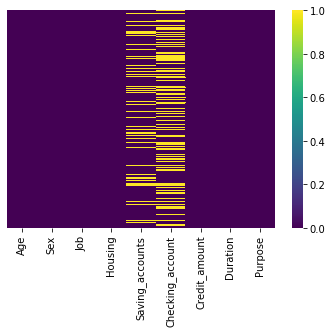

In [46]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

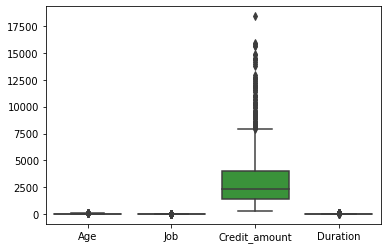

In [47]:
sns.boxplot(data=data)

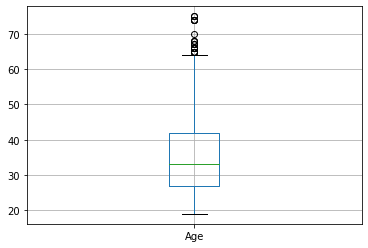

In [48]:
# play with NaN values so we use boxplot
data.boxplot(column='Age') 

In [49]:
data[data.Age >= 60].shape[0]


51

In [50]:
median1 = data.loc[data['Age'] < 60,'Age'].median()
data['Age'] = np.where(data['Age'] > 60, median1,data['Age'])

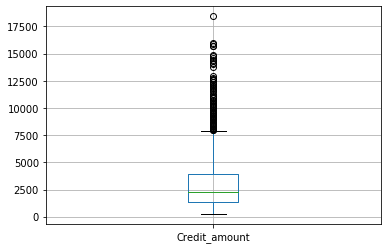

In [53]:
data.boxplot(column='Credit_amount') 


In [54]:
data[data.Credit_amount >= 7000].shape[0] 


105

In [55]:
median2 = data.loc[data['Credit_amount'] < 7000,'Credit_amount'].median()
data['Credit_amount'] = np.where(data['Credit_amount'] > 7000, median2,data['Credit_amount'])

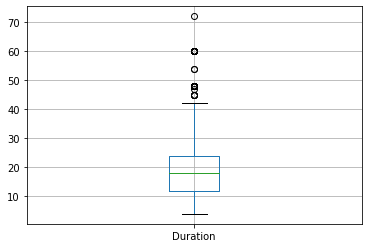

In [56]:
data.boxplot(column='Duration') 


In [57]:
data[data.Duration >= 40].shape[0] 


82

In [58]:
median3 = data.loc[data['Duration'] < 40,'Duration'].median()
data['Duration'] = np.where(data['Duration'] > 40, median3,data['Duration'])

In [59]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
def train_cats(df):
    for n, c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered()
            
train_cats(data)

data['Sex']=data.Sex.cat.codes #male=1 and female=0

In [60]:
data['Housing'] = data['Housing'].map( {'free':0,'own':1,'rent':2})


In [61]:
data['Purpose'] = data['Purpose'].map( {'business':0,'car':1,'domestic appliances':2,"education":3,"furniture/equipment":4,
                                        "radio/TV":5,"repairs":6,"vacation/others":7})

In [62]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32.0,1,2,1,NaN,little,1169.0,6.0,5
1,22.0,0,2,1,little,moderate,5951.0,18.0,5
2,49.0,1,1,1,little,NaN,2096.0,12.0,3
3,45.0,1,2,0,little,little,2080.0,18.0,4
4,53.0,1,2,0,little,little,4870.0,24.0,1


In [63]:
data.groupby(['Saving_accounts']).size()

Saving_accounts
little        603
moderate      103
quite rich     63
rich           48
dtype: int64

In [64]:
data['Saving_accounts'] = data['Saving_accounts'].map( {'little':0,'moderate':1,'quite rich':2,"rich":3})


In [65]:
data['Saving_accounts'] = data['Saving_accounts'].fillna(0)


In [66]:
data.head()


,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32.0,1,2,1,0.0,little,1169.0,6.0,5
1,22.0,0,2,1,0.0,moderate,5951.0,18.0,5
2,49.0,1,1,1,0.0,NaN,2096.0,12.0,3
3,45.0,1,2,0,0.0,little,2080.0,18.0,4
4,53.0,1,2,0,0.0,little,4870.0,24.0,1


In [67]:
data.groupby(['Checking_account']).size()


Checking_account
little      274
moderate    269
rich         63
dtype: int64

In [68]:
data['Checking_account'] = data['Checking_account'].map({'little':0,'moderate':1,"rich":2})
data['Checking_account'] = data['Checking_account'].fillna(0)

In [69]:
data.head()


,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32.0,1,2,1,0.0,0.0,1169.0,6.0,5
1,22.0,0,2,1,0.0,1.0,5951.0,18.0,5
2,49.0,1,1,1,0.0,0.0,2096.0,12.0,3
3,45.0,1,2,0,0.0,0.0,2080.0,18.0,4
4,53.0,1,2,0,0.0,0.0,4870.0,24.0,1


In [70]:
data['Age']=data['Age'].astype('int')
data['Saving_accounts']=data['Saving_accounts'].astype('int')
data['Checking_account']=data['Checking_account'].astype('int')
data['Credit_amount']=data['Credit_amount'].astype('int')
data['Duration']=data['Duration'].astype('int')

In [71]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,18,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,2080,18,4
4,53,1,2,0,0,0,4870,24,1


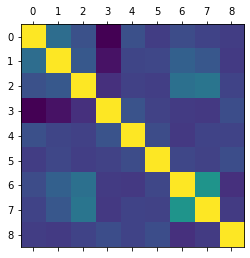

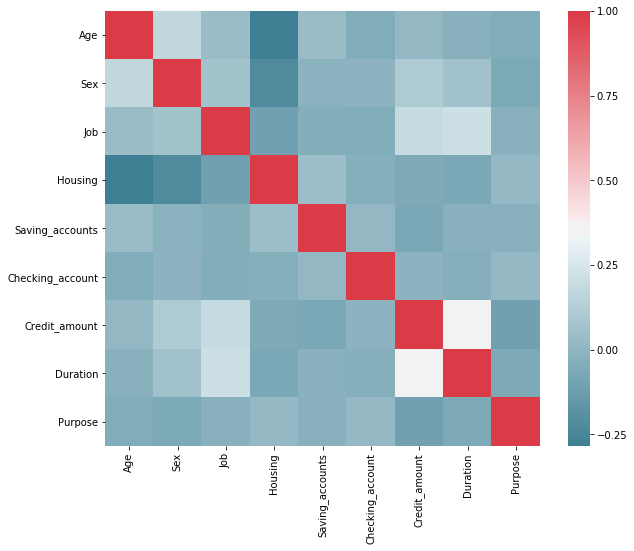

In [72]:
import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.show()

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [73]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,18,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,2080,18,4
4,53,1,2,0,0,0,4870,24,1


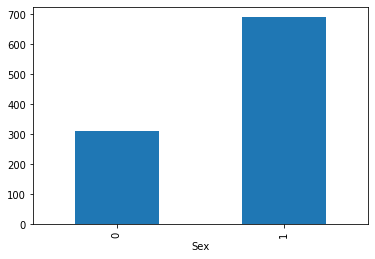

In [74]:
data.groupby(['Sex']).size().plot(kind='bar')

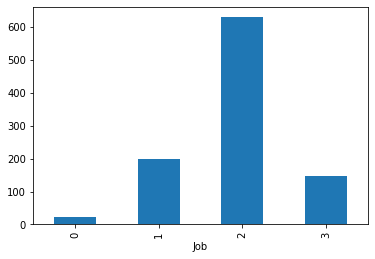

In [75]:
data.groupby(['Job']).size().plot(kind='bar')


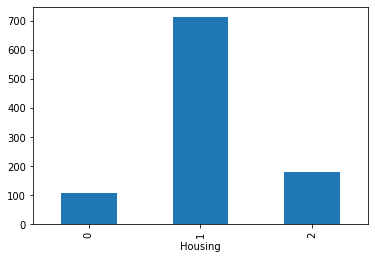

In [76]:
data.groupby(['Housing']).size().plot(kind='bar')


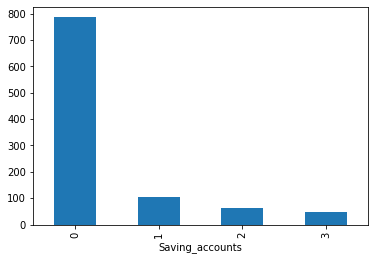

In [77]:
data.groupby(['Saving_accounts']).size().plot(kind='bar')


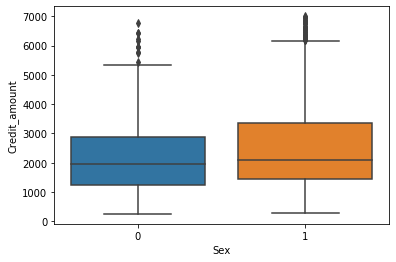

In [79]:
sns.boxplot(x='Sex',y='Credit_amount',data=data)

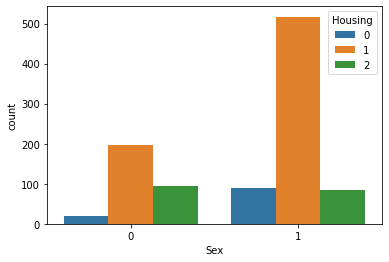

In [81]:
sns.countplot(x='Sex',hue='Housing',data=data)

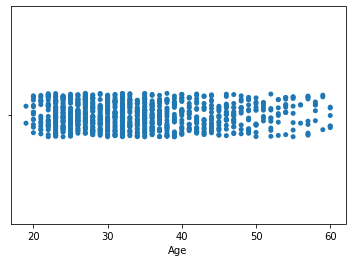

In [82]:
sns.stripplot('Age',data=data)


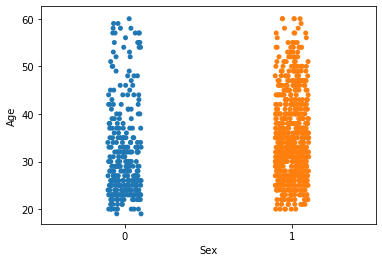

In [83]:
sns.stripplot(x='Sex',y='Age',data=data) # comparison of data distribution


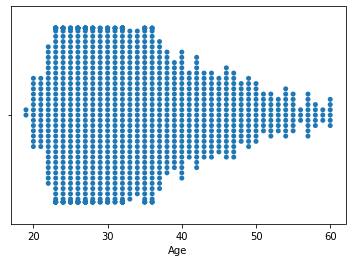

In [85]:
sns.swarmplot('Age',data=data) 

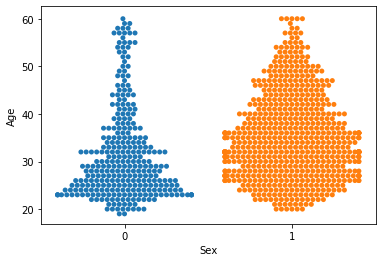

In [86]:
sns.swarmplot(x='Sex',y='Age',data=data)


(array([ 16.,  14.,  75.,  44.,  41., 101.,  43.,  37.,  78.,  79.,  65.,
         40.,  39.,  53.,  21.,  25.,  39.,  17.,  17.,  33.,  17.,  26.,
         12.,   8.,  16.,  10.,   8.,  12.,   5.,   9.]),
 array([19.        , 20.36666667, 21.73333333, 23.1       , 24.46666667,
        25.83333333, 27.2       , 28.56666667, 29.93333333, 31.3       ,
        32.66666667, 34.03333333, 35.4       , 36.76666667, 38.13333333,
        39.5       , 40.86666667, 42.23333333, 43.6       , 44.96666667,
        46.33333333, 47.7       , 49.06666667, 50.43333333, 51.8       ,
        53.16666667, 54.53333333, 55.9       , 57.26666667, 58.63333333,
        60.        ]),
 <a list of 30 Patch objects>)

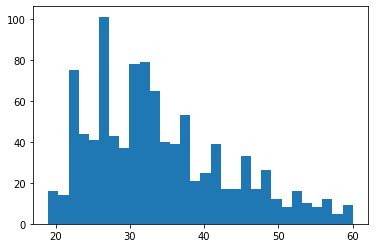

In [89]:
plt.hist('Age',bins=30,data=data)


In [99]:

#Selecting columns for clusterisation with k-means
selected_cols = ["Age","Credit_amount", "Duration"]
cluster_data = data.loc[:,selected_cols]



In [100]:

def distributions(df):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit_amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    

    plt.tight_layout()

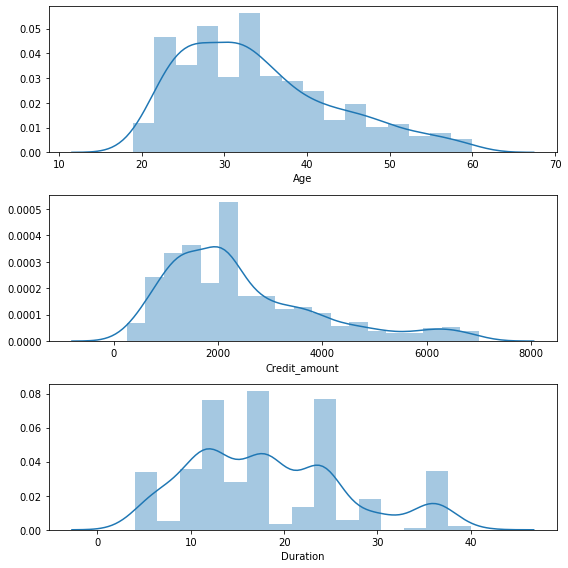

In [101]:
distributions(cluster_data)

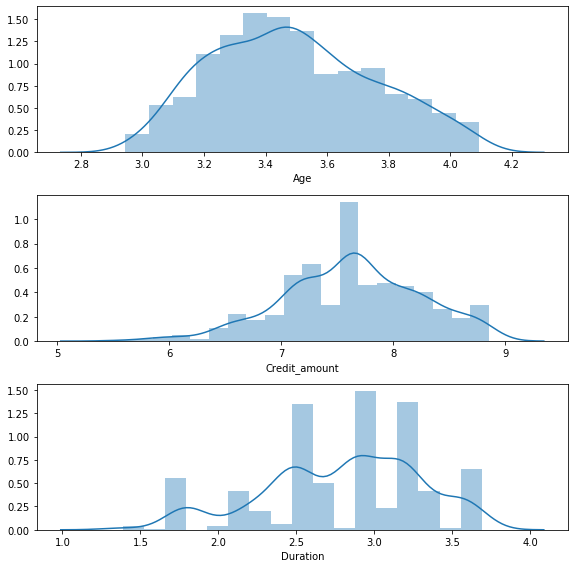

In [102]:
# eliminate the right skewness
cluster_log = np.log(cluster_data)
distributions(cluster_log)

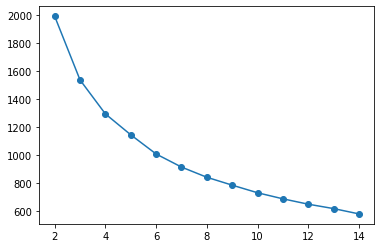

In [104]:

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [107]:
data.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,32,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,18,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,2080,18,4
4,53,1,2,0,0,0,4870,24,1


# k-mean clustering

In [109]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

In [114]:
kmeans_sel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [111]:
labels.head()

,0
0,0
1,1
2,2
3,2
4,2


In [113]:
clustered_data.head()

,Age,Credit_amount,Duration,Cluster
0,32,1169,6,0
1,22,5951,18,1
2,49,2096,12,2
3,45,2080,18,2
4,53,4870,24,2
